In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
# Load the dataset
digits = load_digits()
X = digits.data
y = digits.target

print(f"Data shape (X): {X.shape}") # (1797 samples, 64 features)
print(f"Target shape (y): {y.shape}") # (1797 labels)

Data shape (X): (1797, 64)
Target shape (y): (1797,)


#### Data Scaling

In [6]:
# Scale the data so that each feature has a mean of 0 and a variance of 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Data has been scaled.")

Data has been scaled.


#### Applying PCA

In [9]:
# Create a PCA instance with n_components=2
pca = PCA(n_components=2)

# Fit PCA on the scaled data and transform it
principal_components = pca.fit_transform(X_scaled)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['target'] = y

print("PCA transformation complete. New shape:", principal_components.shape)
pca_df.head()

PCA transformation complete. New shape: (1797, 2)


,PC1,PC2,target
0,-1.914214,-0.954502,0
1,-0.588980,0.924636,1
2,-1.302039,-0.317189,2
3,3.020770,-0.868772,3
4,-4.528949,-1.093480,4


#### Checking Explained Variance

In [12]:
# Check the explained variance
explained_variance = pca.explained_variance_ratio_
total_explained_variance = np.sum(explained_variance)

print(f"Explained variance by PC1: {explained_variance[0]:.2%}")
print(f"Explained variance by PC2: {explained_variance[1]:.2%}")
print(f"Total explained variance by both components: {total_explained_variance:.2%}")

Explained variance by PC1: 12.03%
Explained variance by PC2: 9.56%
Total explained variance by both components: 21.59%


#### Visualizing the 2D Projection

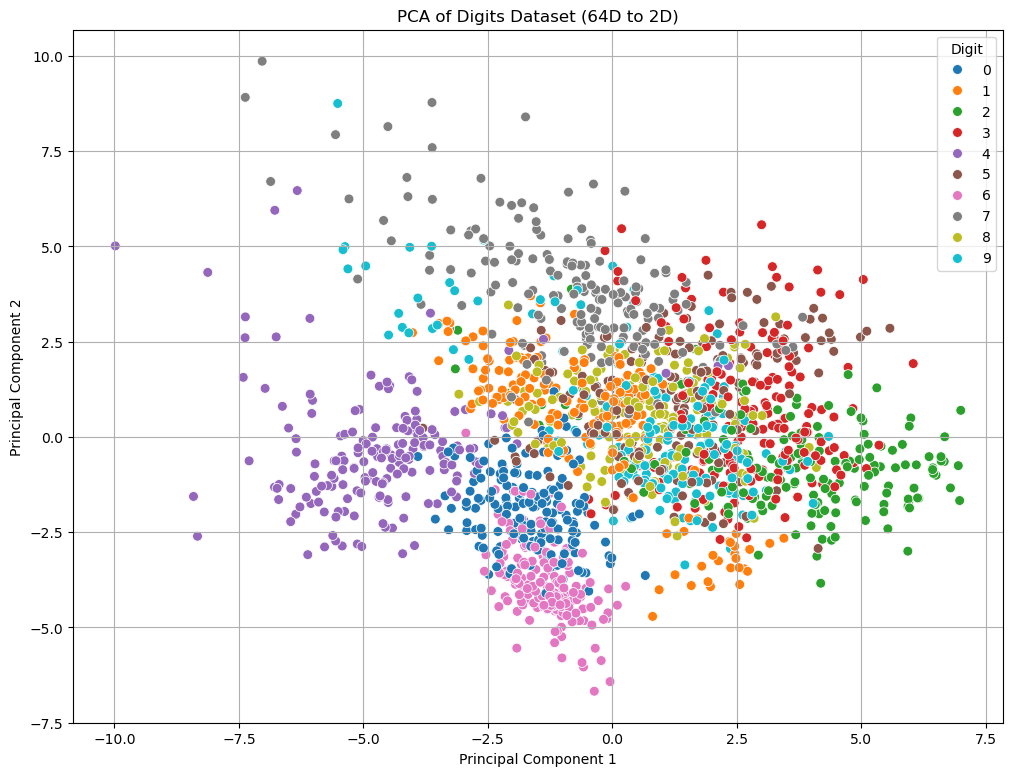

In [15]:
# Visualize the 2D PCA results
plt.figure(figsize=(12, 9))
sns.scatterplot(x='PC1', y='PC2', hue='target', data=pca_df, palette=sns.color_palette('tab10', 10), legend='full', s=50)

plt.title('PCA of Digits Dataset (64D to 2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Digit')
plt.grid()
plt.show()